# Лабораторна робота 9 (1 частина)

Романенко Ілля ФІТ 4-7

## Крок 1

завантажимо датасет та підготуємо дані

In [1]:
from keras import datasets

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

2024-10-14 19:19:49.973792: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-14 19:19:50.059009: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-14 19:19:50.085523: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-14 19:19:50.236111: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-14 19:19:51.464015: W tensorflow/compiler/tf2

In [2]:
from keras.utils import to_categorical

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Крок 2

завантажимо попередньо навчену модель MobileNetV2, без верхніх шарів.

модель VGG16 виявилась занадто великою аби використовувати її в даному випадку, тому й було вирішено використовувати модель з меншою кількістю параметрів.

In [3]:
from keras.applications import MobileNetV2

base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(32, 32, 3)
)

/tmp/ipykernel_5487/3232596987.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


## Крок 3

заморозимо всі шари окрім останніх 4

In [4]:
for layer in base_model.layers[:-4]:
    layer.trainable = False

додамо зверху 4 власних шари

In [5]:
from keras import layers, models

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [6]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 1, 1, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        81,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,340,618 (8.93 MB)

 Trainable params: 495,434 (1.89 MB)

 Non-trainable params: 1,845,184 (7.04 MB)

## Крок 4

натренуємо модель

In [8]:
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=16, 
    validation_data=(x_test, y_test), 
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/20


2024-10-14 19:19:57.819417: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.3198 - loss: 1.9883 - val_accuracy: 0.5053 - val_loss: 1.4125 - learning_rate: 0.0010
Epoch 2/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 68s 22ms/step - accuracy: 0.4392 - loss: 1.5966 - val_accuracy: 0.5416 - val_loss: 1.3356 - learning_rate: 0.0010
Epoch 3/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 62s 20ms/step - accuracy: 0.4731 - loss: 1.5130 - val_accuracy: 0.5498 - val_loss: 1.2823 - learning_rate: 0.0010
Epoch 4/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 64s 20ms/step - accuracy: 0.4976 - loss: 1.4615 - val_accuracy: 0.5589 - val_loss: 1.2754 - learning_rate: 0.0010
Epoch 5/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 64s 20ms/step - accuracy: 0.5109 - loss: 1.4201 - val_accuracy: 0.5739 - val_loss: 1.2460 - learning_rate: 0.0010
Epoch 6/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 64s 20ms/step - accuracy: 0.5220 - loss: 1.3738 - val_accuracy: 0.5809 - val_loss: 1.2276 - learning_rate: 0.0010
Epoch 7/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 63s 20ms/step - accuracy: 0.5289 

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Тестова точність: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6319 - loss: 1.1313
Тестова точність: 0.6299999952316284


## Крок 5

побудуємо графіки втрат і точності

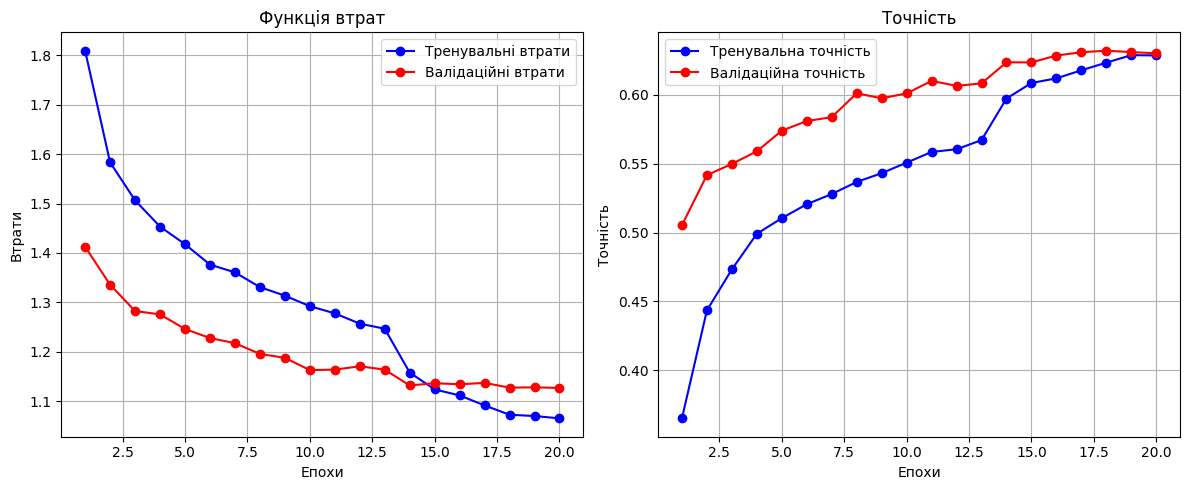

In [10]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Тренувальні втрати')
plt.plot(epochs, val_loss, 'ro-', label='Валідаційні втрати')
plt.title('Функція втрат')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo-', label='Тренувальна точність')
plt.plot(epochs, val_accuracy, 'ro-', label='Валідаційна точність')
plt.title('Точність')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Крок 6

виведемо класифікаційний звіт

In [11]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

print(classification_report(y_true, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
              precision    recall  f1-score   support

           0       0.66      0.67      0.67      1000
           1       0.69      0.73      0.71      1000
           2       0.59      0.49      0.53      1000
           3       0.50      0.47      0.48      1000
           4       0.57      0.62      0.59      1000
           5       0.55      0.55      0.55      1000
           6       0.68      0.71      0.69      1000
           7       0.66      0.66      0.66      1000
           8       0.67      0.68      0.68      1000
           9       0.71      0.72      0.72      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000



In [12]:
from datetime import datetime


save_date = datetime.now().strftime("%S_%M_%H_%d_%m_%Y")
model_name_path = f'models/cifar10_model_{save_date}.keras'
model.save(model_name_path) 

## Крок 7

виведемо візуалізацію розпізнавання

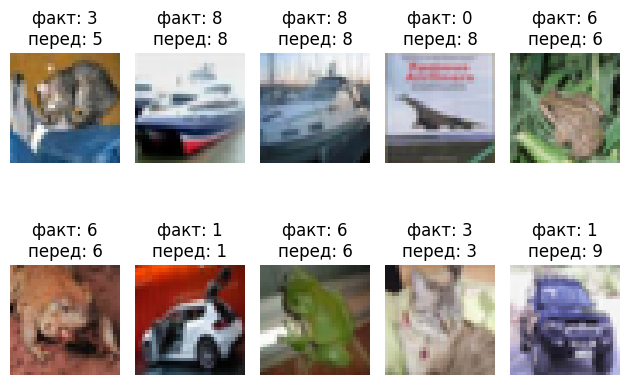

In [14]:
import numpy as np

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i])
    plt.title(f'факт: {np.argmax(y_test[i])}\nперед: {y_pred_classes[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

на цій вибірці можемо явно бачити достатньо поганий результат натренованої моделі

## Висновки

Побудована модель, яку можна назвати надбудовою над вже існуючою моделлю, показала достатньо поганий результат. Тренувальна точність в 0.62 показує, що така модель може правильно описати об'єкт на зображені в трохи більше ніж в половині випадків. До цього необхідно додати що модель тренувалась ще й повільніше, ніж створена власна модель в першій частині цієї лабораторної.